<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/PETROL_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df1 = pd.read_csv('/content/sample_data/crude-oil-price.csv')

In [3]:
df1

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.2700,NaN,NaN
1,1983-04-04T00:00:00,30.6300,4.646,1.3600
2,1983-05-02T00:00:00,30.2500,-1.241,-0.3800
3,1983-06-01T00:00:00,31.3800,3.736,1.1300
4,1983-07-01T00:00:00,32.0000,1.976,0.6200
...,...,...,...,...
486,2023-09-01T00:00:00,88.8000,7.040,5.8400
487,2023-10-02T00:00:00,80.5000,-9.347,-8.3000
488,2023-11-01T00:00:00,76.0500,-5.528,-4.4500
489,2023-12-01T00:00:00,71.6500,-5.786,-4.4000


In [4]:
df2 = pd.read_csv('/content/sample_data/GEDEvent_v24_0_3.csv')

In [5]:
df2

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,517321,AFG-2024-1-1-XXX700-12,2024,0,Check dyad,1,XXX700,1,XXX700,1-XXX700,...,2024-03-31 00:00:00.000,5,0,7,0,12,12,9,NaN,NaN
1,513593,PAK-2024-1-857-59,2024,1,Check dyad,1,404,404,Pakistan: Government,857,...,2024-03-02 00:00:00.000,0,0,0,3,3,3,3,770.0,NaN
2,515307,AFG-2024-3-951-12,2024,0,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2024-03-07 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
3,517479,AFG-2024-3-951-19,2024,0,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2024-03-24 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
4,516833,AFG-2024-3-951-15,2024,0,Clear,3,130,484,Government of Afghanistan - Civilians,130,...,2024-03-21 00:00:00.000,0,0,0,0,0,1,0,700.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,516540,YEM-2024-1-14595-34,2024,1,Clear,1,230,230,Yemen (North Yemen): Government,14595,...,2024-03-25 00:00:00.000,0,0,1,0,1,1,1,678.0,NaN
1920,517589,YEM-2024-2-14596-7,2024,0,Clear,2,14596,13587,AQAP - Forces of the Presidential Leadership C...,14596,...,2024-03-24 00:00:00.000,0,2,0,0,2,5,2,NaN,NaN
1921,517564,AUL-2024-1-17738-15,2024,0,Check,1,16099,16099,"Australia, Bahrain, Canada, France, Italy, Net...",17738,...,2024-03-14 00:00:00.000,0,7,0,0,7,7,7,NaN,678.0
1922,517054,AUL-2024-1-17738-12,2024,0,Check,1,16099,16099,"Australia, Bahrain, Canada, France, Italy, Net...",17738,...,2024-03-06 00:00:00.000,0,0,3,0,3,3,3,NaN,678.0


In [6]:
df3 = pd.read_csv('/content/sample_data/USD_NGN Historical Data (2).csv')

In [7]:
df3

,Date,Price,Open,High,Low,Vol.,Change %
0,05/06/2024,1406.34,1393.74,1406.34,1391.34,NaN,0.90%
1,05/05/2024,1393.74,1382.50,1393.74,1382.50,NaN,0.81%
2,05/03/2024,1382.50,1372.95,1409.42,1372.95,NaN,2.41%
3,05/02/2024,1349.90,1390.52,1397.26,1350.90,NaN,-2.81%
4,05/01/2024,1389.00,1390.00,1394.26,1390.00,NaN,0.00%
...,...,...,...,...,...,...,...
7487,07/17/1995,83.75,83.75,83.75,83.75,NaN,0.60%
7488,07/14/1995,83.25,83.25,83.25,83.25,NaN,0.30%
7489,07/13/1995,83.00,83.00,83.00,83.00,NaN,0.30%
7490,07/12/1995,82.75,82.75,82.75,82.75,NaN,0.61%


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           491 non-null    object 
 1   price          491 non-null    float64
 2   percentChange  490 non-null    float64
 3   change         490 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.5+ KB


In [9]:
df1.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


In [10]:
df1.isnull().sum()

date             0
price            0
percentChange    1
change           1
dtype: int64

In [13]:
# prompt: fill the null values by mean in df1 in percentChange     change    feature

df1['percentChange'] = df1['percentChange'].fillna(df1['percentChange'].mean())
df1['change'] = df1['change'].fillna(df1['change'].mean())



In [14]:
df1.isnull().sum()

date             0
price            0
percentChange    0
change           0
dtype: int64

NameError: name 'plt' is not defined

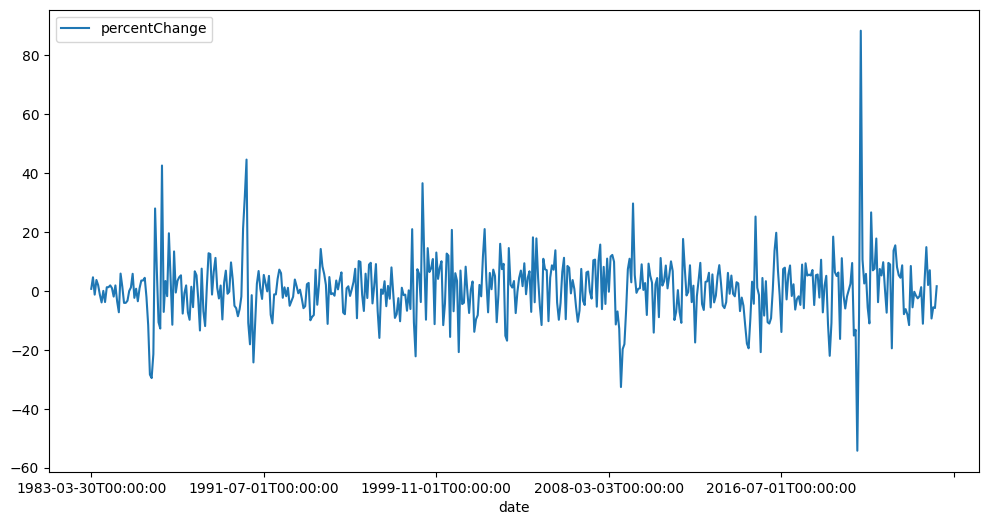

In [16]:
# prompt: make a plot for percentChange  and date

df1.plot(x='date', y='percentChange', figsize=(12, 6))
plt.xlabel('date')
plt.ylabel('Percent Change')
plt.title('Percent Change of Crude Oil Price Over Time')
plt.xticks(rotation=45)
plt.show()


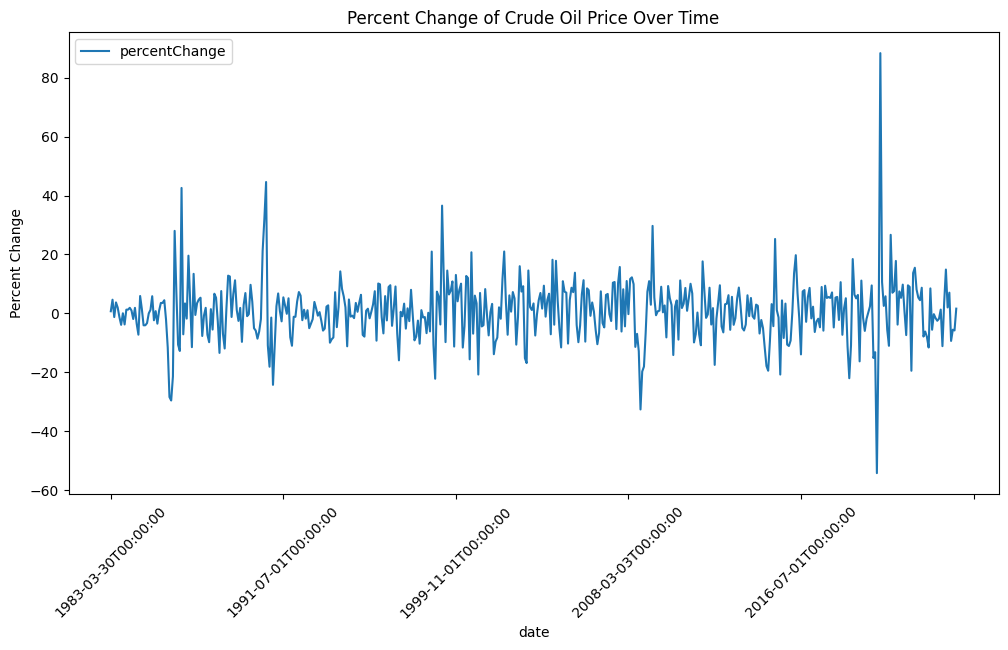

In [17]:
# prompt: make a plot for percentChange  and date
import matplotlib.pyplot as plt # Import the matplotlib library

df1.plot(x='date', y='percentChange', figsize=(12, 6))
plt.xlabel('date')
plt.ylabel('Percent Change')
plt.title('Percent Change of Crude Oil Price Over Time')
plt.xticks(rotation=45)
plt.show()

In [18]:
# prompt: make  a good plot using plotly betwen price and date

import plotly.express as px

fig = px.line(df1, x="date", y="price", title="Price of Crude Oil Over Time")

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Price",
    font_family="Arial",
    font_size=12,
    title_font_family="Arial",
    title_font_size=16,
)

fig.update_xaxes(tickformat="%d/%m/%Y")

fig.show()


In [19]:
# prompt: make  a good plot using plotly betwen  percentage change and date and price

fig = px.scatter(df1, x="date", y="percentChange", size="price", color="price",
                 hover_data=["price", "percentChange"])

fig.update_layout(
    title="Relationship between Percentage Change and Price of Crude Oil",
    xaxis_title="Date",
    yaxis_title="Percentage Change",
)

fig.update_xaxes(tickformat="%d/%m/%Y")

fig.show()


In [20]:
# Convert the date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Sort the data by date
df1 = df1.sort_values(by='date')

# Display the cleaned dataframe
df1.head()


,date,price,percentChange,change
0,1983-03-30,29.27,0.727065,0.088852
1,1983-04-04,30.63,4.646000,1.360000
2,1983-05-02,30.25,-1.241000,-0.380000
3,1983-06-01,31.38,3.736000,1.130000
4,1983-07-01,32.00,1.976000,0.620000


In [21]:
# Extract year, month, and day from the date
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

In [36]:
# Create lag features for the price (e.g., price from 1 day, 7 days, and 30 days ago)
df1['price_lag1'] = df1['price'].shift(1)
df1['price_lag7'] = df1['price'].shift(7)
df1['price_lag30'] = df1['price'].shift(30)

# Drop rows with missing lag features
df1 = df1.dropna()

# Display the cleaned and feature-engineered dataframe
df1.head()



,date,price,percentChange,change,year,month,day,price_lag1,price_lag7,price_lag30
30,1985-09-03,29.08,3.561,1.00,1985,9,3,28.08,26.73,29.27
31,1985-10-01,30.38,4.470,1.30,1985,10,1,29.08,28.29,30.63
32,1985-11-01,29.75,-2.074,-0.63,1985,11,1,30.38,27.63,30.25
33,1985-12-02,26.30,-11.597,-3.45,1985,12,2,29.75,27.84,31.38
34,1986-01-02,18.83,-28.403,-7.47,1986,1,2,26.30,26.87,32.00


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [38]:
features = ['year', 'month', 'day', 'price_lag1', 'price_lag7', 'price_lag30']
X = df1[features]
y = df1['price']

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X.isnull().sum()

year           0
month          0
day            0
price_lag1     0
price_lag7     0
price_lag30    0
dtype: int64

In [33]:
X.isnull().sum()

year            0
month           0
day             0
price_lag1      1
price_lag7      7
price_lag30    30
dtype: int64

In [41]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

In [43]:
mae

3.450703292673178

In [45]:
import numpy as np

def predict_fuel_price(date_str, model, df1):
    date = pd.to_datetime(date_str)
    year, month, day = date.year, date.month, date.day

    # Extract lag features
    price_lag1 = df1[df1['date'] == date - pd.Timedelta(days=1)]['price'].values[0]
    price_lag7 = df1[df1['date'] == date - pd.Timedelta(days=7)]['price'].values[0]
    price_lag30 = df1[df1['date'] == date - pd.Timedelta(days=30)]['price'].values[0]

    # Prepare the input features
    input_features = np.array([[year, month, day, price_lag1, price_lag7, price_lag30]])

    # Predict the price
    predicted_price = model.predict(input_features)

    return predicted_price[0]

# Example usage
predicted_price = predict_fuel_price('2023-06-01', model, df1)
print(f'Predicted Fuel Price on 2023-06-01: {predicted_price}')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
import numpy as np
import pandas as pd

def predict_fuel_price(date_str, model, df1):
    date = pd.to_datetime(date_str)
    year, month, day = date.year, date.month, date.day

    # Extract lag features, handling potential missing dates and filling with a default value
    price_lag1 = df1[df1['date'] == date - pd.Timedelta(days=1)]['price'].values[0] if (date - pd.Timedelta(days=1)) in df1['date'].values else df1['price'].mean()
    price_lag7 = df1[df1['date'] == date - pd.Timedelta(days=7)]['price'].values[0] if (date - pd.Timedelta(days=7)) in df1['date'].values else df1['price'].mean()
    price_lag30 = df1[df1['date'] == date - pd.Timedelta(days=30)]['price'].values[0] if (date - pd.Timedelta(days=30)) in df1['date'].values else df1['price'].mean()

    # Prepare the input features
    input_features = np.array([[year, month, day, price_lag1, price_lag7, price_lag30]])

    # Predict the price
    predicted_price = model.predict(input_features)

    return predicted_price[0]

# Example usage
predicted_price = predict_fuel_price('2023-06-01', model, df1)
print(f'Predicted Fuel Price on 2023-06-01: {predicted_price}')

Predicted Fuel Price on 2023-06-01: 48.39094736204693


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

